# Processing OM10 systems with a null-deblender

In this notebook, we will discuss how we could process OM10 lensed systems with a null-deblender. 

## Requirements

OM10 and SLRealizer are the only requirements.

In [1]:
import om10
import desc.slrealizer
import warnings
warnings.filterwarnings("ignore")

/Users/Jenny/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


After importing the packages, we have to load the OM10 catalog. We will query the systems that satisfy the criteria : `maglim=23.3,area=18000.0,IQ=0.75`.

In [2]:
db = om10.DB()
db.select_random(maglim=23.3,area=18000.0,IQ=0.75)
db.paint(synthetic=True)
realizer = desc.slrealizer.SLRealizer(catalog=db, observation="../../../data/twinkles_observation_history.csv")

OM10: Full db.lenses table contains 15658 systems
OM10: Initial db.sample contains 15658 systems
OM10: selection yields 2813 lenses


Here we are enabling the inline options for matplotlib and pylab so that we can see the plot in the jupyter notebook.

In [3]:
%matplotlib inline
%pylab inline
matplotlib.use('TkAgg')
matplotlib.rc('text', usetex=False)

Populating the interactive namespace from numpy and matplotlib


This process is not strictly necessary, but here we are choosing a good lens system, with large image separations and full four images.

In [4]:
wide = db.sample[np.where(db.sample['IMSEP'] > 1.0)]
print "Number of lenses with image separation > 1.0 arcsec = ",len(wide)

wide_quads = wide[np.where(wide['NIMG'] == 4)]
print "Number of these with 4 images = ",len(wide_quads)

bright_wide_quads = wide[np.where(wide_quads['MAGI'] < 22)]
print "Number of these with i3 < 22 = ",len(bright_wide_quads)

db.sample = bright_wide_quads    
                      
k = db.sample[0]['LENSID']

Number of lenses with image separation > 1.0 arcsec =  1920
Number of these with 4 images =  260
Number of these with i3 < 22 =  117


Then, we call the method `deblend` in the SLRealizer package. We need to specify the lensID and whether we want to null_deblend the objects. This method uses `skimage.measure.moments` method and plots both the original array and null-deblended array.

OM10: Extracted OM10 lens number 4121205:
 LENSID FLAGTYPE NIMG ZLENS ... i_SDSS_quasar z_SDSS_quasar u_SDSS_quasar
------- -------- ---- ----- ... ------------- ------------- -------------
4121205        0    2  0.45 ...         23.43 23.4148792187 23.9485369662
##################### PLOTTING ALL SOURCES ##################################


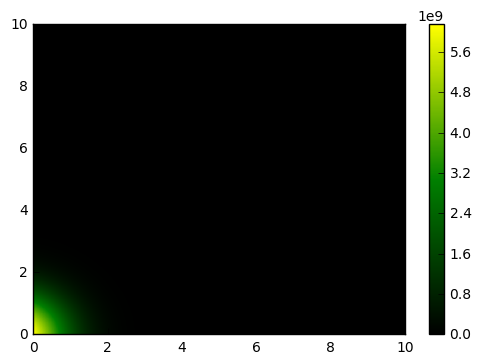

('first:', 5598661144.3324795, 0.7329755381191001, 0.59822216350510304, array([[  3.20852103e-01,  -1.58903702e-04],
       [ -1.58903702e-04,   2.42886060e-01]]))
##################### AFTER NULL DEBLENDING ##################################


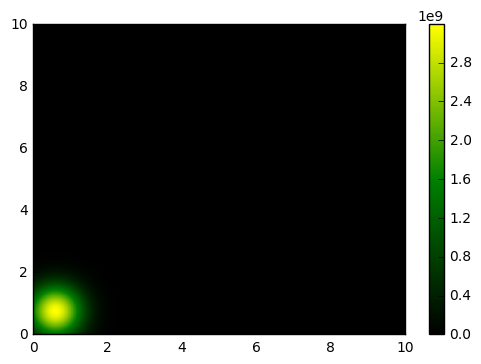

##################### DEBLENDING DEBLENDED OBJECT #################################
('first:', 4500412685.7140598, 0.83994495921075707, 0.70268927331097419, array([[  2.30409876e-01,  -7.93557402e-05],
       [ -7.93557402e-05,   1.68916771e-01]]))


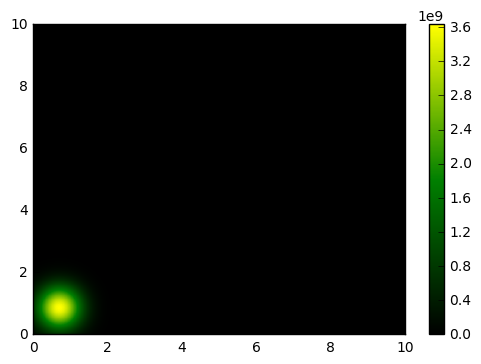

##################### DEBLENDING DEBLENDED OBJECT #################################
('first:', 4140144756.04247, 0.88226122438580756, 0.74156215286098248, array([[  1.92847538e-01,  -5.50019899e-05],
       [ -5.50019899e-05,   1.39884049e-01]]))


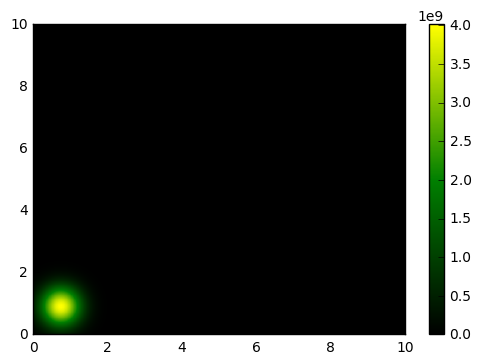

##################### DIFFERENCE BETWEEN TWO IMAGES ##################################


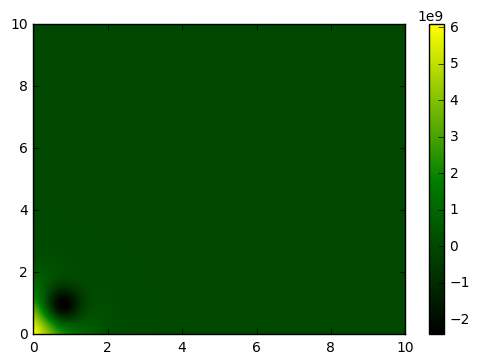

In [5]:
realizer.deblend(lensID=k, null_deblend=True)